In [11]:
from AnomalyDetection import AnomalyDetectionAlgorithm

In [13]:
AD = AnomalyDetectionAlgorithm()

Epsilon: 0.00016060614128431407, F1 Score: 0.975609756097561
Confusion Matrix:
[[299   1]
 [  0  20]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       300
         1.0       0.95      1.00      0.98        20

    accuracy                           1.00       320
   macro avg       0.98      1.00      0.99       320
weighted avg       1.00      1.00      1.00       320



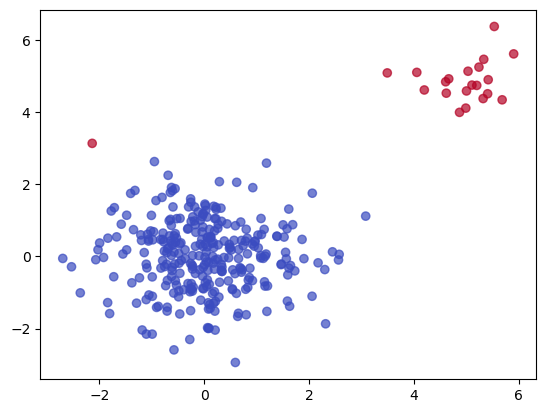

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Generate a skewed dataset
np.random.seed(42)
normal_data = np.random.normal(0, 1, (1000, 2))
anomalies = np.random.normal(5, 0.5, (20, 2))
data = np.vstack([normal_data, anomalies])
labels = np.hstack([np.zeros(1000), np.ones(20)])

# Split into training (normal only) and validation sets
x_train, x_val, _, y_val = train_test_split(normal_data, np.zeros(1000), test_size=0.3, random_state=42)
x_val = np.vstack([x_val, anomalies])
y_val = np.hstack([y_val, np.ones(20)])

# Assume fit, get_probability, and select_epsilon functions are already implemented
AD.fit(x_train)
best_epsilon, best_f1 = AD.select_epsilon(x_val, y_val)
predictions = AD.predict(x_val)

# Evaluation and Visualization
print(f"Epsilon: {best_epsilon}, F1 Score: {best_f1}\nConfusion Matrix:\n{confusion_matrix(y_val, predictions)}")
print(classification_report(y_val, predictions))
plt.scatter(x_val[:, 0], x_val[:, 1], c=predictions, cmap='coolwarm', alpha=0.7)
plt.show()
